The basic idea is the same of minimizing the corst fuction and get the optimal intecept and slope

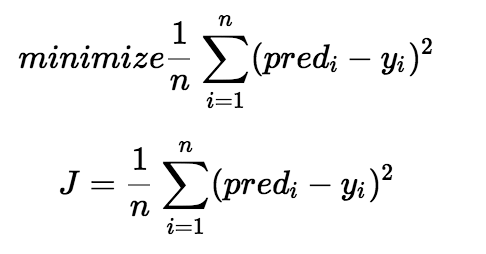 

but here considering the final formula:

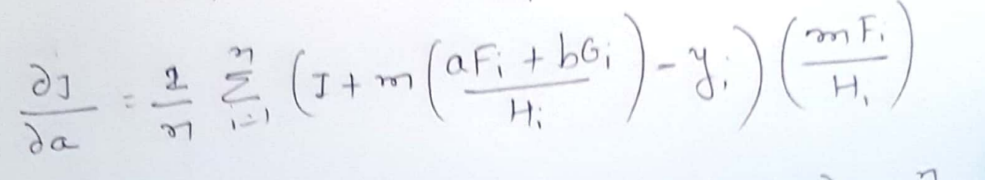

and we get:

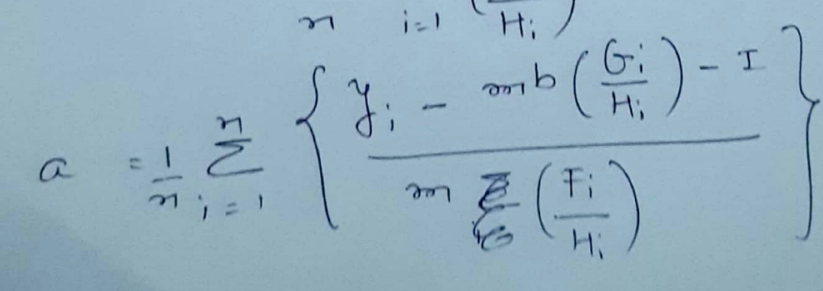

In [1]:
import pandas as pd
import numpy as np 

filename = "./data/OAD.xlsx"
atomicsheetname = "OAD"
materisheetname = "MaterialData"

xls = pd.ExcelFile(filename)
matdata = pd.read_excel(xls, materisheetname)
atodata = pd.read_excel(xls, atomicsheetname)

yi = matdata["DE"].values
atomsa = matdata["A"].values
atomsb = matdata["B"].values

Consider the first formula: (rp_B^3 - exp(rs_B))/((rp_A^2))


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import math

rp_bi = []
rs_bi = []
rp_ai = []
xi = []

for a, b in zip(atomsa, atomsb):
    a = a.replace(" ", "")
    b = b.replace(" ", "")
    
    rp_bi.append(atodata[atodata["A"] == b]["rp"].values[0])
    rs_bi.append(atodata[atodata["A"] == b]["rs"].values[0])
    rp_ai.append(atodata[atodata["A"] == a]["rp"].values[0])
    xi.append((rp_bi[-1]**3 - math.exp(rs_bi[-1]))/rp_ai[-1]**2)
    
#Linear regression
regressor = LinearRegression()
regressor.fit((np.array(xi)).reshape(-1,1), yi)
y_pred = regressor.predict((np.array(xi)).reshape(-1,1))
mse = mean_squared_error(yi, y_pred)
slope = regressor.coef_[0]
inter = regressor.intercept_
print(mse, slope, inter)

0.014222705127012937 -0.7507116478782628 -0.31702207185307846


0.014020703761651158 1.0999999999999812


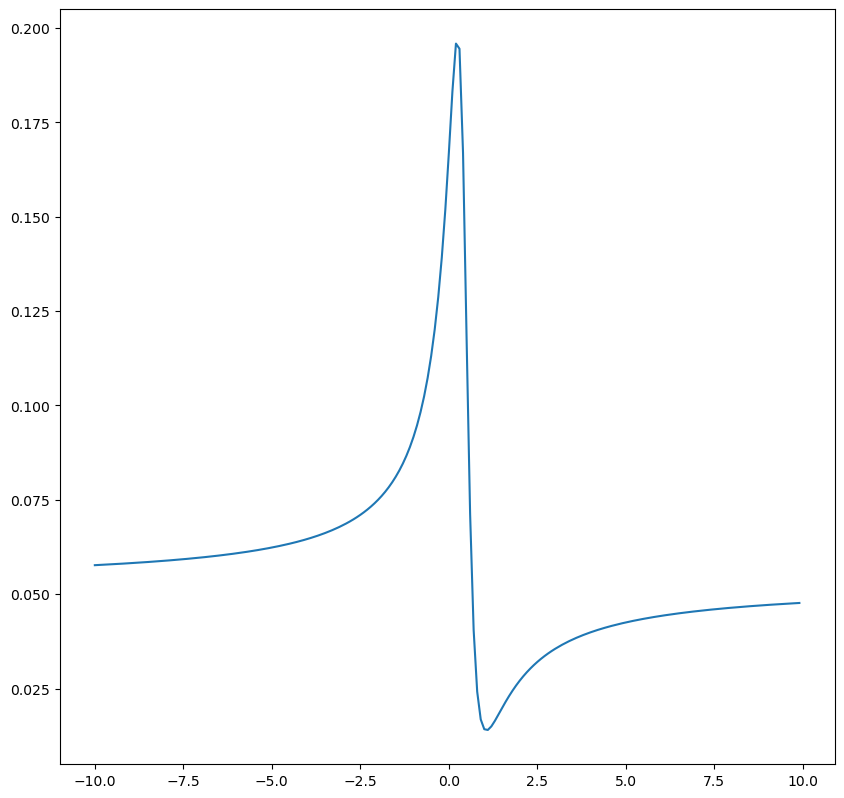

In [40]:
#grid search 

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=100)

N = 200
minv = -10.0
maxv = 10.0
d = (maxv-minv)/float(N)

A = minv 
msevals = []
Avals = []
for i in range(N):
    xi = []
    for k in range(len(yi)):
        xi.append((rp_bi[k]**3 - (A * math.exp(rs_bi[k])))/rp_ai[k]**2)
    
    regressor = LinearRegression()
    regressor.fit((np.array(xi)).reshape(-1,1), yi)
    y_pred = regressor.predict((np.array(xi)).reshape(-1,1))
    mse = mean_squared_error(yi, y_pred)
    slope = regressor.coef_[0]
    inter = regressor.intercept_
    #print(mse, slope, inter)
    
    msevals.append(mse)
    Avals.append(A)
    
    A += d
    
min_value = min(msevals)
min_index = msevals.index(min_value)

print(msevals[min_index], Avals[min_index])

plt.plot(Avals, msevals)
plt.show()

0.014084743940325802 0.8999999999999811


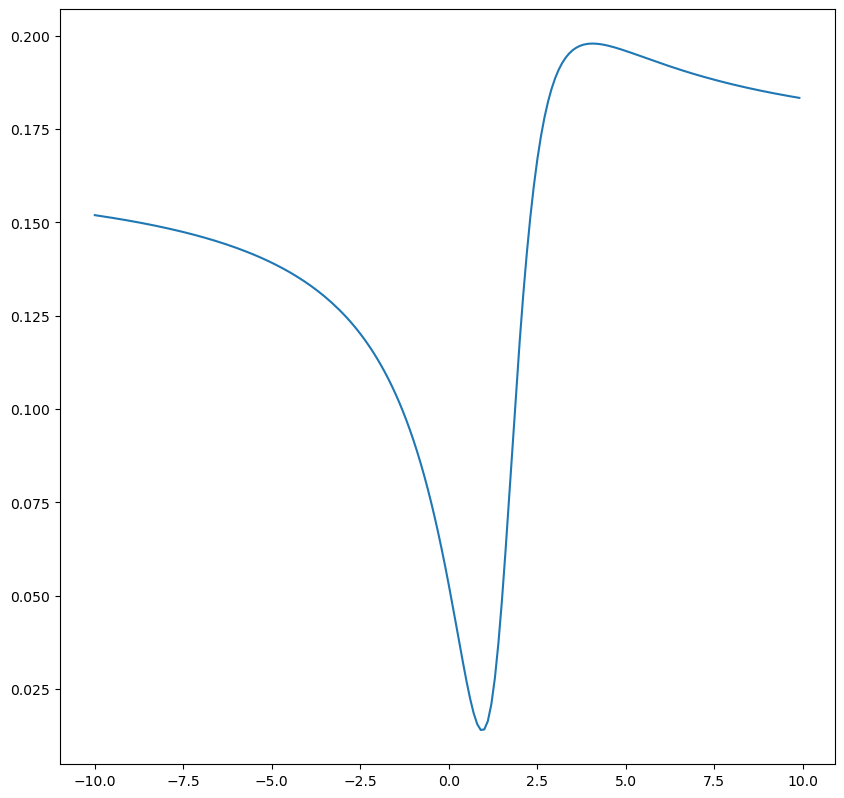

In [39]:
#grid search 

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=100)

N = 200
minv = -10.0
maxv = 10.0
d = (maxv-minv)/float(N)

A = minv 
msevals = []
Avals = []
for i in range(N):
    xi = []
    for k in range(len(yi)):
        xi.append(((A * rp_bi[k]**3) - math.exp(rs_bi[k]))/rp_ai[k]**2)
    
    regressor = LinearRegression()
    regressor.fit((np.array(xi)).reshape(-1,1), yi)
    y_pred = regressor.predict((np.array(xi)).reshape(-1,1))
    mse = mean_squared_error(yi, y_pred)
    slope = regressor.coef_[0]
    inter = regressor.intercept_
    #print(mse, slope, inter)
    
    msevals.append(mse)
    Avals.append(A)
    
    A += d
    
min_value = min(msevals)
min_index = msevals.index(min_value)

print(msevals[min_index], Avals[min_index])

plt.plot(Avals, msevals)
plt.show()

0.013911968934547039 -6.799999999999997 -7.1999999999999975


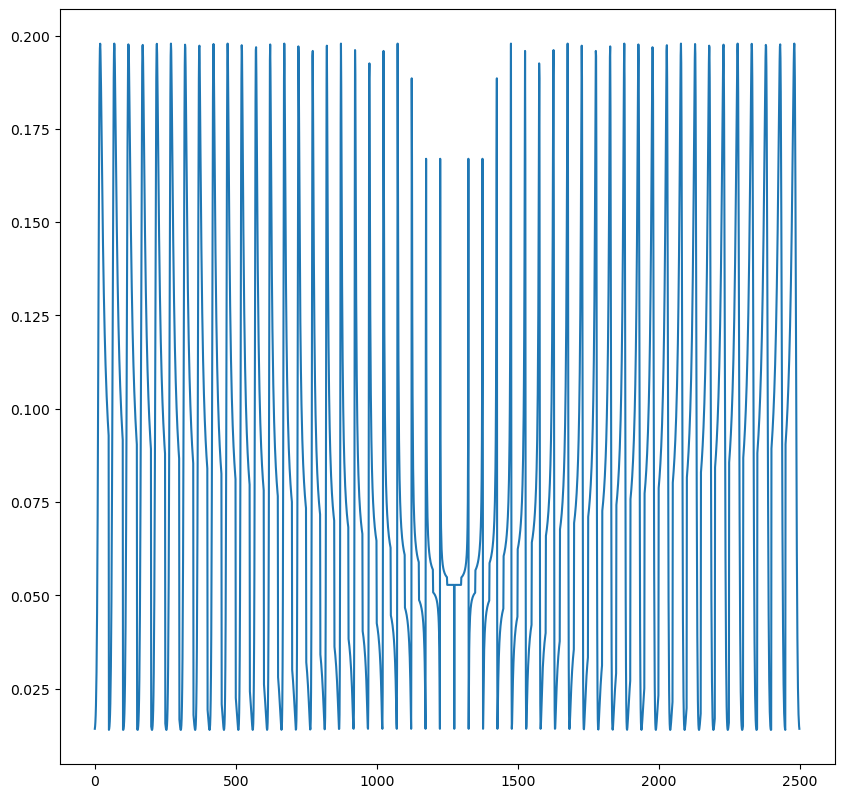

In [46]:

import matplotlib.pyplot as plt
from operator import add

from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=100)

N = 50
minv = -10.0
maxv = 10.0
d = (maxv-minv)/float(N)

A = minv
B = minv 

msevals = []
Avals = []
Bvals = []
x = []
idx = 0

for i in range(N):
    B = minv 
    for j in range(N):

        xi = []
        for k in range(len(yi)):
            xi.append(((A * rp_bi[k]**3) - (B * math.exp(rs_bi[k])))/rp_ai[k]**2)
    
        regressor = LinearRegression()
        regressor.fit((np.array(xi)).reshape(-1,1), yi)
        y_pred = regressor.predict((np.array(xi)).reshape(-1,1))
        mse = mean_squared_error(yi, y_pred)
        slope = regressor.coef_[0]
        inter = regressor.intercept_
        #print(mse, slope, inter)
    
        msevals.append(mse)
        Avals.append(A)
        Bvals.append(B)
        x.append(idx)

        idx = idx + 1

        #print(A,B)

        B += d

    A += d
    
min_value = min(msevals)
min_index = msevals.index(min_value)

print(msevals[min_index], Avals[min_index], Bvals[min_index])

#x = list( map(add, Avals, Bvals) )

plt.plot(x, msevals)
plt.show()